# Principal Component Analysis with Cancer Data

In [383]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [384]:
BCDF = pd.read_csv("breast-cancer-wisconsin-data.csv")
BCDF.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [388]:
print("Data types, shapes and describe")
print("*"*30)
print(BCDF.dtypes,'\n\n Shapes: ',BCDF.shape)
pd.DataFrame(BCDF.describe(include = 'all').T)

Data types, shapes and describe
******************************
ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object 

 Shapes:  (699, 11)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


Righ skewness is observed in clumpthinkness, cell size, shape, marginal adhesion, single epithelial cell size, normal nucleoli, bland chromatin,mitoses

In [386]:
BCDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [389]:
# We could see "?" values in column, this should be removed from data set
BCDF['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [402]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [390]:
BCDF['Bare Nuclei'].mode()[0]  #Replace with first highest frequency item in the column

'1'

In [391]:
#replacing ? with mode. Note: Imputing Median also give 1.0 
BCDF['Bare Nuclei'] = BCDF['Bare Nuclei'].replace('?',BCDF['Bare Nuclei'].mode()[0])

In [392]:
BCDF['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [393]:
BCDF['Bare Nuclei'] = BCDF['Bare Nuclei'].astype('int64')

In [394]:
BCDF.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [395]:
BCDF.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [396]:
BCDF.duplicated(keep = 'first').sum()  #9 duplicates observed.

9

In [397]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
BCDF1 = BCDF.drop_duplicates(keep = 'first')

In [398]:
BCDF1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int64
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int64(11)
memory usage: 64.7 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


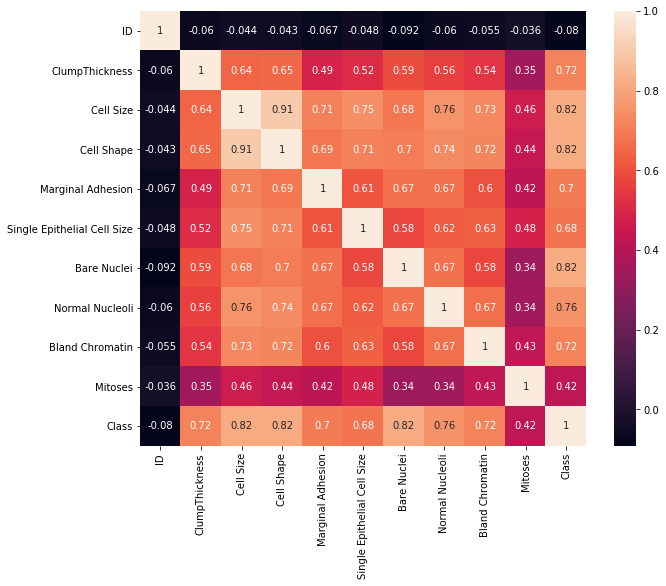

In [401]:
# Check for correlation of variable
plt.figure(figsize = (10,8))
sns.heatmap(BCDF1.corr(), annot = True)

1. Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli and bland chromatin
2. Target variable shows high correlation with most of these variables

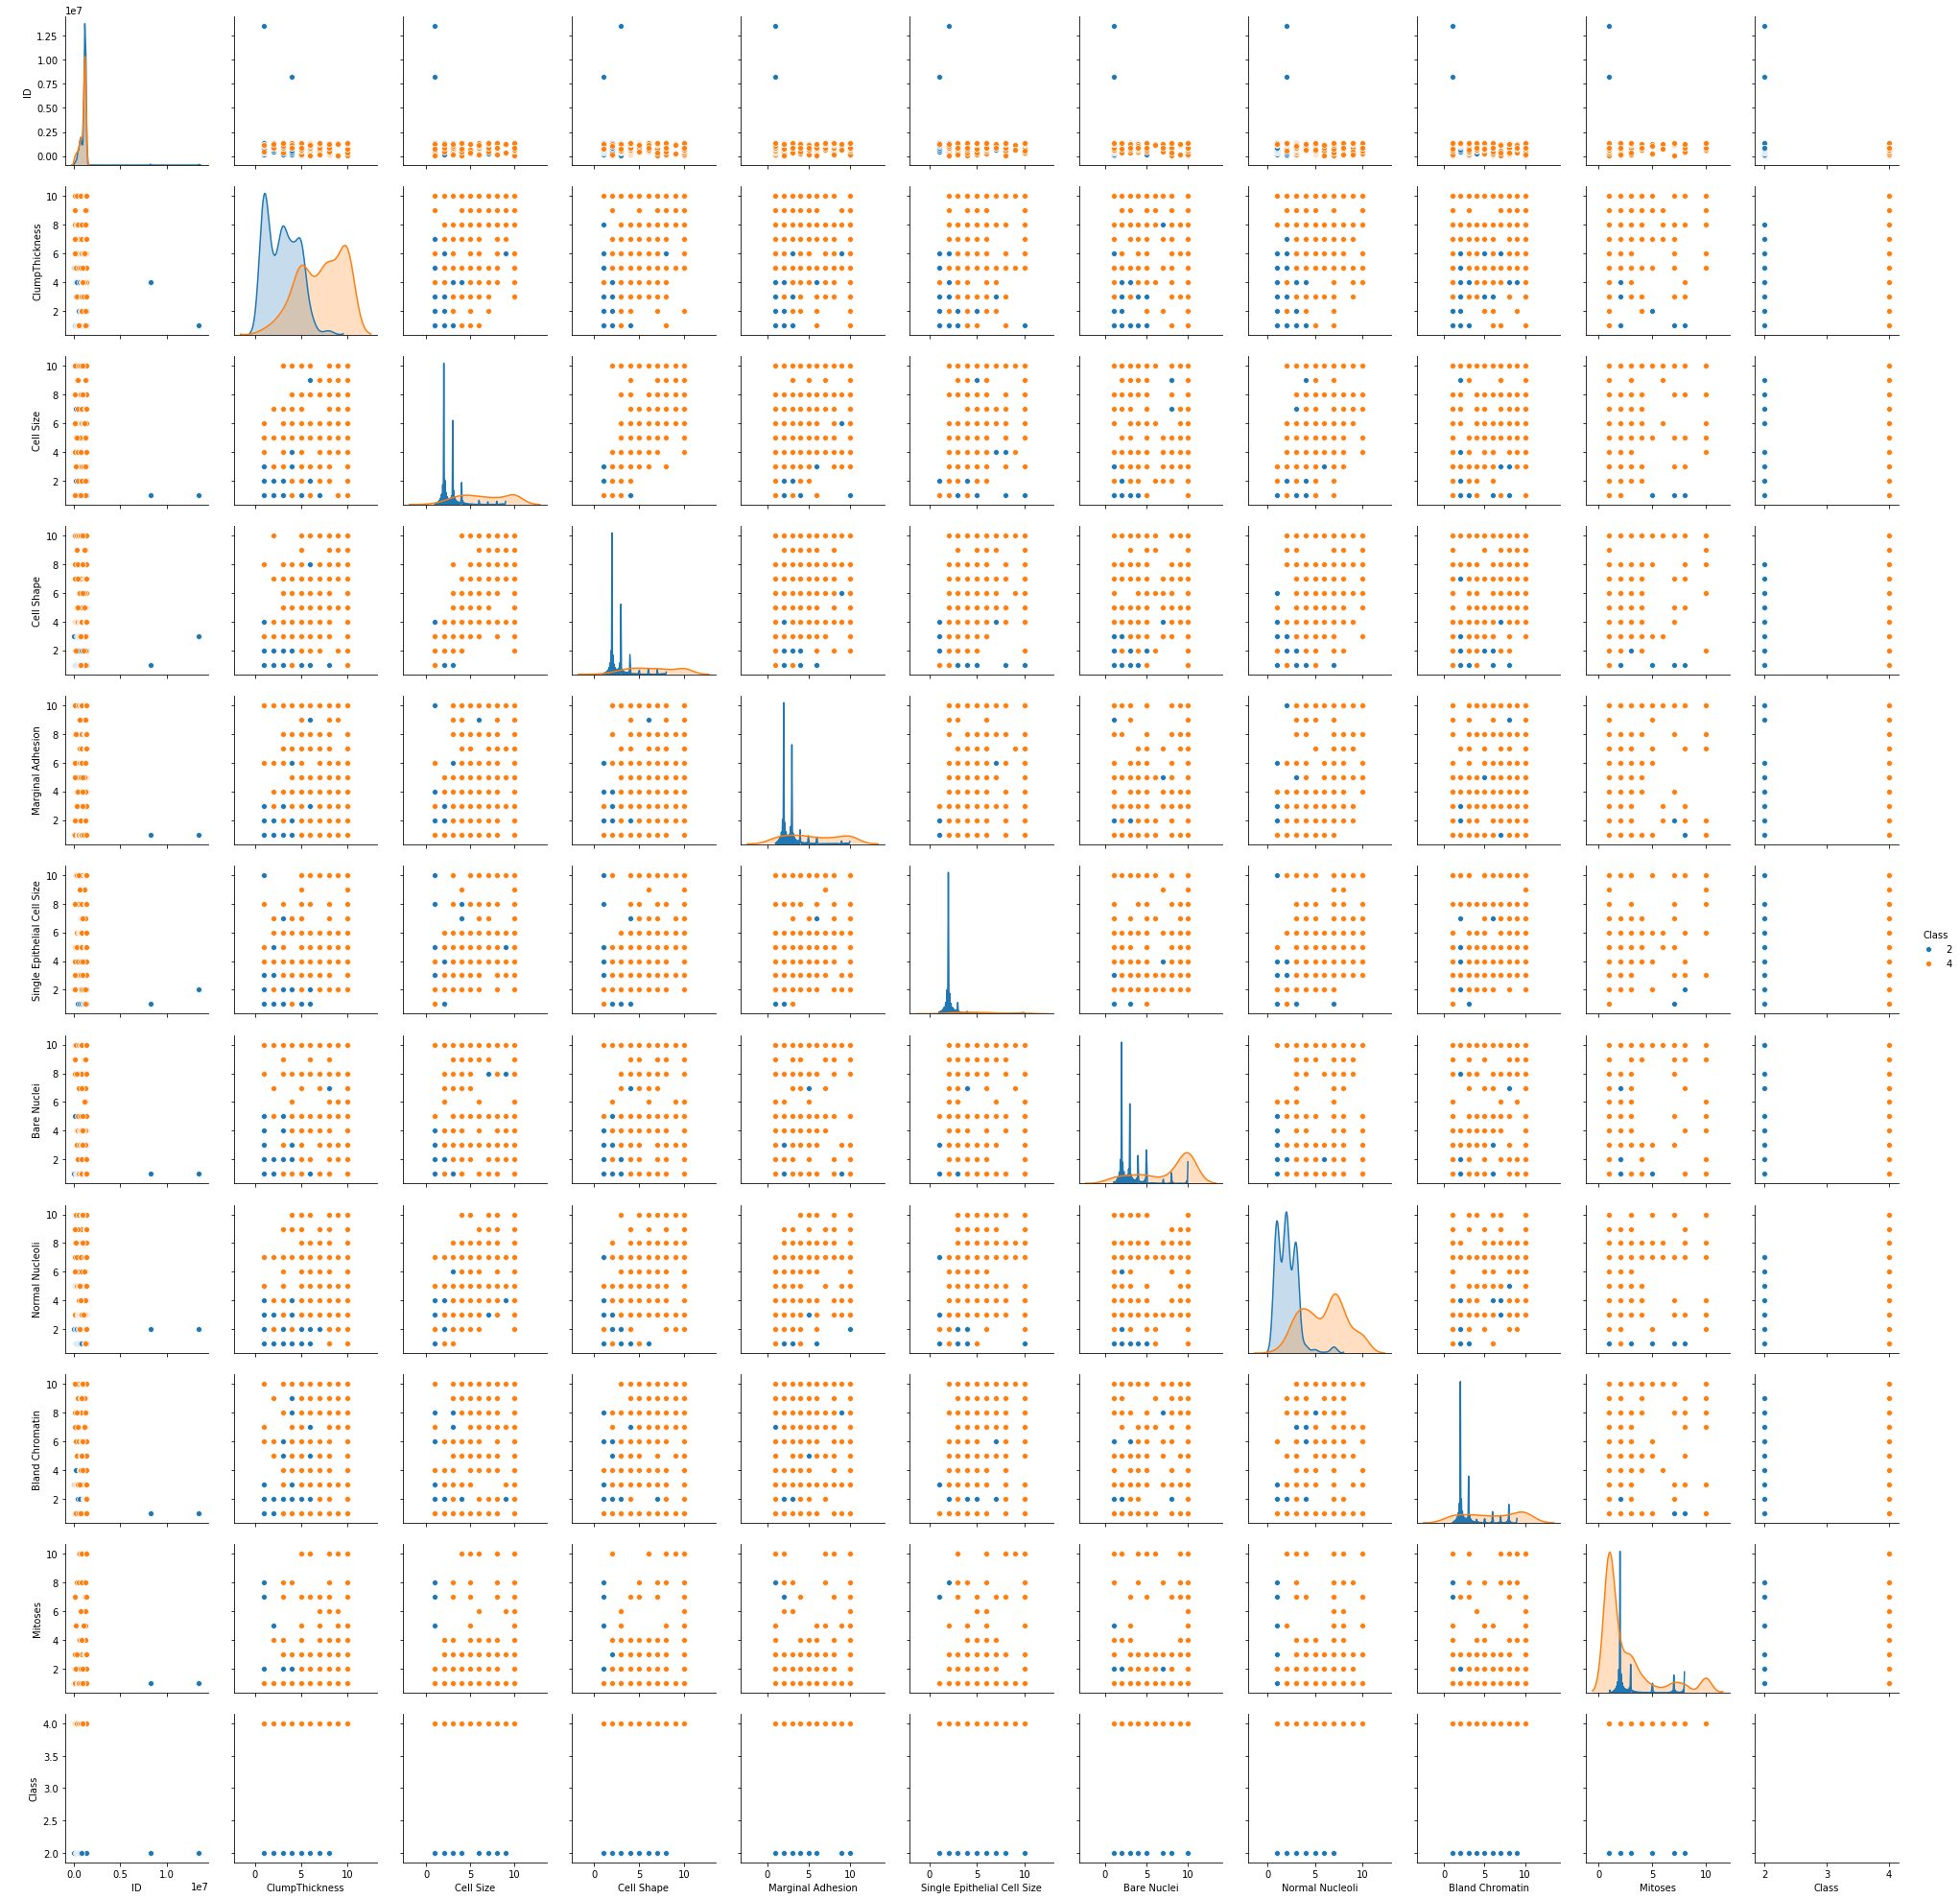

In [403]:
#Let us check for pair plots
sns.pairplot(BCDF1,hue = 'Class')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [417]:
BCDF2 = BCDF1.iloc[:,1:10].copy()

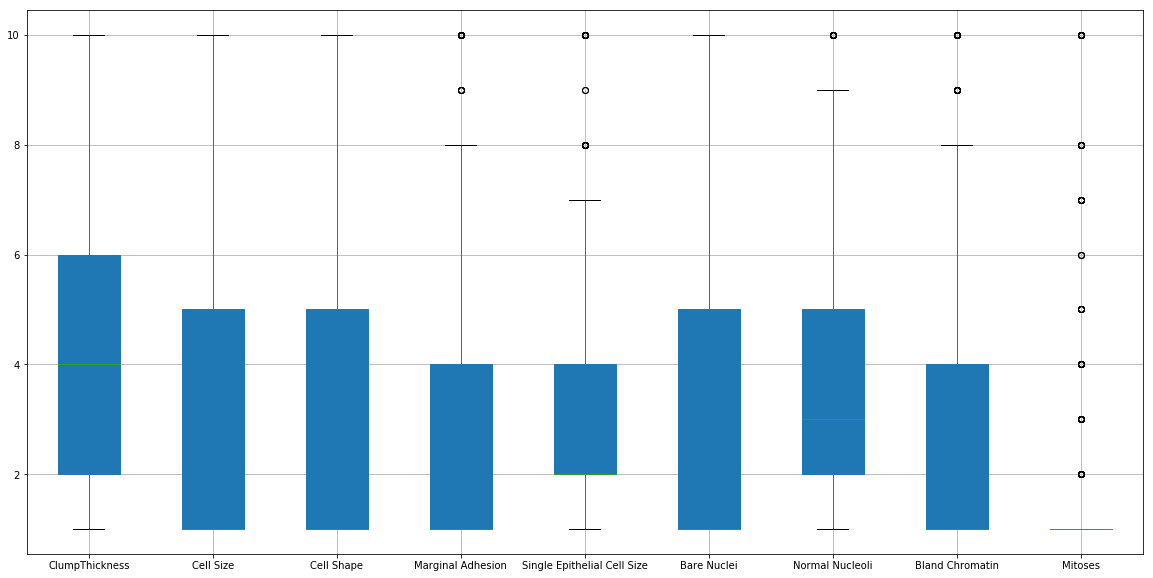

In [418]:
#BCDF1.boxplot(column = ["ClumpThickness","Cell Size","Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Normal Nucleoli","Bland Chromatin","Mitoses"],figsize=(15,10),patch_artist = True) 
BCDF2.boxplot(figsize=(20,10),patch_artist = True) 
plt.show()

In [419]:
BCDF2.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,690.0,4.428986,2.817378,1.0,2.0,4.0,6.0,10.0
Cell Size,690.0,3.133333,3.042451,1.0,1.0,1.0,5.0,10.0
Cell Shape,690.0,3.204348,2.960844,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,690.0,2.827536,2.867787,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,690.0,3.213043,2.200964,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,690.0,3.482609,3.617064,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,690.0,3.436232,2.444060,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,690.0,2.885507,3.067682,1.0,1.0,1.0,4.0,10.0
Mitoses,690.0,1.594203,1.724230,1.0,1.0,1.0,1.0,10.0


In [ ]:
#for i in list(BCDF2):
  #  print(BCDF2.boxplot(by='Class',column = i,))

In [420]:
#Trying to impute the outliers above the whisker visible in box plot, to 75th quartile for below features.

BCDF2['Marginal Adhesion'] = np.where(BCDF2['Marginal Adhesion']>8,4,BCDF2['Marginal Adhesion'])
BCDF2['Single Epithelial Cell Size'] = np.where(BCDF2['Single Epithelial Cell Size']>7,4,BCDF2['Single Epithelial Cell Size'])
BCDF2['Normal Nucleoli'] = np.where(BCDF2['Normal Nucleoli']>8,5,BCDF2['Normal Nucleoli'])
BCDF2['Bland Chromatin'] = np.where(BCDF2['Bland Chromatin']>8,4,BCDF2['Bland Chromatin'])
BCDF2['Mitoses'] = np.where(BCDF2['Mitoses']>1,1,BCDF2['Mitoses'])

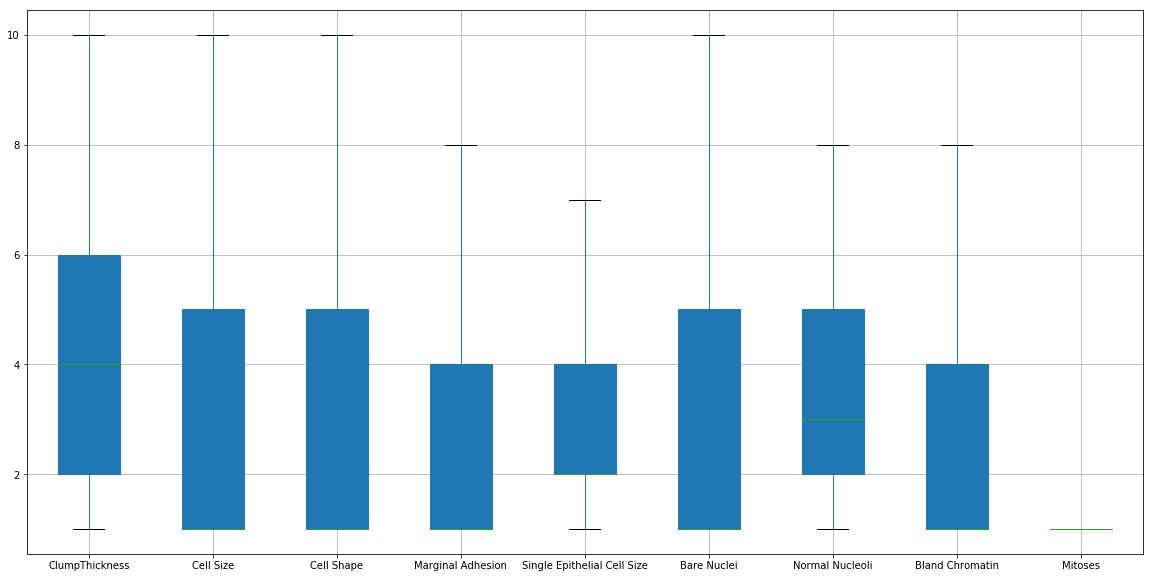

In [423]:
#After removing the outliers, the boxplot of the columns look like below.
#BCDF2.boxplot(column = ["ClumpThickness","Cell Size","Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Normal Nucleoli","Bland Chromatin","Mitoses"],figsize=(15,10),patch_artist = True) 
BCDF2.boxplot(figsize=(20,10),patch_artist = True)

# Q6 Create a covariance matrix for identifying Principal components

In [425]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [430]:
sc = StandardScaler()
BCDF3 = BCDF2.copy()  #Taking a copy to work with.

In [431]:
BCDF3.shape

(690, 9)

In [432]:
BCDF3_scaled = sc.fit_transform(BCDF3)  #scaling the entire dataset.

In [433]:
Cov_BCDF = np.cov(BCDF3_scaled.T)  #creating a covariance matrix

In [434]:
Cov_BCDF  #Covariance matrix

array([[1.00145138, 0.64410677, 0.65453792, 0.49279485, 0.53403385,
        0.59150555, 0.56897331, 0.51578744, 0.        ],
       [0.64410677, 1.00145138, 0.9066632 , 0.69312971, 0.73745171,
        0.68556472, 0.71438909, 0.65740596, 0.        ],
       [0.65453792, 0.9066632 , 1.00145138, 0.66107626, 0.71431099,
        0.70518656, 0.70348728, 0.63949795, 0.        ],
       [0.49279485, 0.69312971, 0.66107626, 1.00145138, 0.64404683,
        0.64939578, 0.65296876, 0.58293653, 0.        ],
       [0.53403385, 0.73745171, 0.71431099, 0.64404683, 1.00145138,
        0.62229193, 0.62665476, 0.62013468, 0.        ],
       [0.59150555, 0.68556472, 0.70518656, 0.64939578, 0.62229193,
        1.00145138, 0.66724455, 0.58982763, 0.        ],
       [0.56897331, 0.71438909, 0.70348728, 0.65296876, 0.62665476,
        0.66724455, 1.00145138, 0.62012481, 0.        ],
       [0.51578744, 0.65740596, 0.63949795, 0.58293653, 0.62013468,
        0.58982763, 0.62012481, 1.00145138, 0.        ],


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [435]:
EVal,EVec = np.linalg.eig(Cov_BCDF)  #finding eigen values and vectors

In [436]:
"Eigen Value:",EVal,"Eigen Vector:",EVec

('Eigen Value:',
 array([5.54627789, 0.09140019, 0.54468944, 0.43893327, 0.41723286,
        0.30290453, 0.3425746 , 0.32759826, 0.        ]),
 'Eigen Vector:',
 array([[ 0.3167712 ,  0.00796614, -0.82387924, -0.08313528, -0.12136816,
         -0.13355318, -0.2829552 , -0.31823537,  0.        ],
        [ 0.38787085,  0.72240046, -0.04850905,  0.02989   ,  0.38452962,
          0.3371265 ,  0.250618  ,  0.01097962,  0.        ],
        [ 0.3844321 , -0.68367526, -0.12350123,  0.05271   ,  0.36211985,
          0.37761232,  0.27628718,  0.12927781,  0.        ],
        [ 0.3431116 , -0.0604817 ,  0.4177582 ,  0.41866916, -0.15417054,
          0.23506283, -0.38123568, -0.55176706,  0.        ],
        [ 0.35163068, -0.03685747,  0.23369047, -0.09863061,  0.52391442,
         -0.64310683, -0.32539035,  0.12925384,  0.        ],
        [ 0.35177464,  0.07137405, -0.04143966,  0.32810467, -0.42434311,
          0.04067506, -0.23271896,  0.72519706,  0.        ],
        [ 0.35488558, -

# Q8 Find variance and cumulative variance by each eigen vector

In [440]:
Var_exp = [( i /sum(EVal)) * 100 for i in sorted(EVal, reverse=True)]
print(Var_exp)

[69.22799756922082, 6.798750499014454, 5.4787141551410095, 5.207852140094873, 4.275976455289671, 4.089043457776516, 3.780819182436467, 1.140846541026187, 0.0]


In [441]:
cum_var_exp = np.cumsum(Var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)
#98% of variance is explained if 7 features.

Cumulative Variance Explained [ 69.22799757  76.02674807  81.50546222  86.71331436  90.98929082
  95.07833428  98.85915346 100.         100.        ]


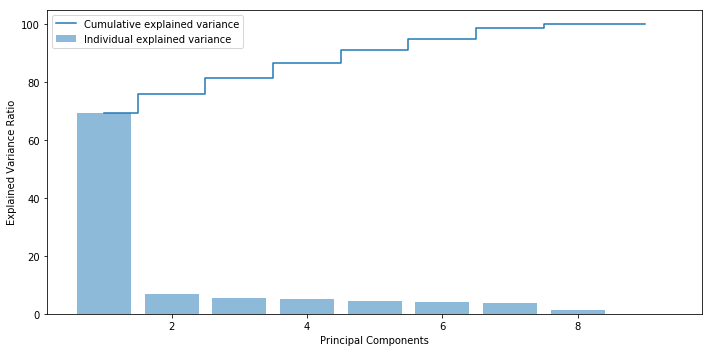

In [442]:
# Ploting the self and cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, EVal.size + 1), Var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, EVal.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [443]:
pca=PCA(n_components=7)

In [444]:
PCAdata = pca.fit_transform(BCDF3_scaled)  #features transformed to equivalent principal components.

In [445]:
PCAdata.shape

(690, 7)

In [446]:
pca.explained_variance_ratio_  #variance of each component.
#69% explained by first principal component
#6% by next principal component
#5% by successive principal component and so on.

array([0.69227998, 0.0679875 , 0.05478714, 0.05207852, 0.04275976,
       0.04089043, 0.03780819])

# Q10 Find correlation between components and features

In [447]:
Comp_Feature = pd.DataFrame(pca.components_,columns = list(BCDF3))  

In [448]:
Comp_Feature #Principal components and features names

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.316771,0.387871,0.384432,0.343112,0.351631,0.351775,0.354886,0.332213,-0.0
1,-0.823879,-0.048509,-0.123501,0.417758,0.233690,-0.041440,0.089667,0.254414,0.0
2,0.083135,-0.029890,-0.052710,-0.418669,0.098631,-0.328105,-0.124769,0.825339,0.0
3,-0.121368,0.384530,0.362120,-0.154171,0.523914,-0.424343,-0.359199,-0.314532,0.0
4,0.282955,-0.250618,-0.276287,0.381236,0.325390,0.232719,-0.683810,0.088423,0.0
5,0.318235,-0.010980,-0.129278,0.551767,-0.129254,-0.725197,0.186545,-0.005462,0.0
6,0.133553,-0.337127,-0.377612,-0.235063,0.643107,-0.040675,0.467779,-0.191326,0.0


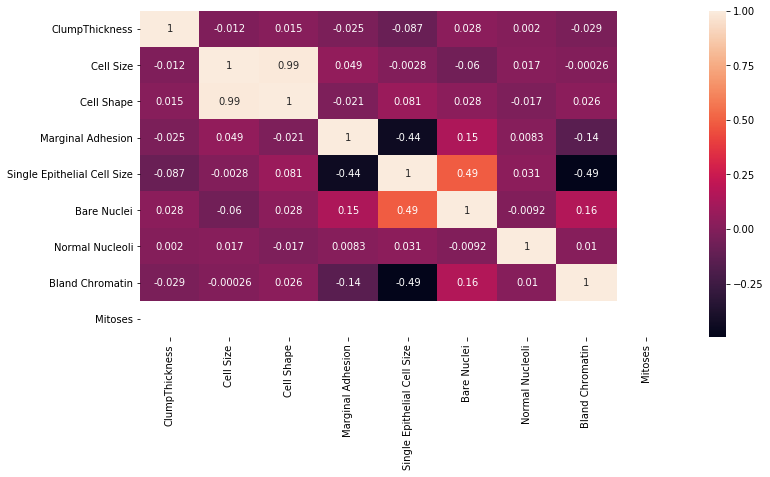

In [449]:
plt.figure(figsize=(12,6))
sns.heatmap(Comp_Feature.corr(),annot=True)   
plt.show()

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [450]:
JokeDF = pd.read_csv("jokes.csv")

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [451]:
ratings =  JokeDF.iloc[:200,1:]

In [452]:
ratings.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [453]:
ratings.replace(99,0,inplace = True)

In [454]:
ratings.head(5)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [455]:
ratings_diff = ratings.mean().nlargest(10)
ratings_diff

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64